In [1]:
import numpy as np
import pandas as pd
import find_split as fs
import evaluation as ev
import matplotlib.pyplot as plt
from trees import binarySearchTree

In [2]:
#using the noisy dataset so we can see the effects of pruning
data = np.loadtxt('noisy_dataset.txt')
print(data[:5])

[[-59. -53. -51. -54. -45. -79. -87.   4.]
 [-66. -53. -59. -62. -69. -81. -79.   1.]
 [-41. -57. -63. -40. -73. -66. -65.   2.]
 [-62. -58. -52. -63. -50. -87. -88.   4.]
 [-63. -58. -64. -67. -74. -87. -87.   4.]]


max depth: 19


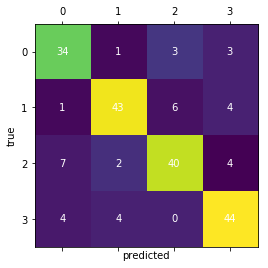

[[34, 1, 7, 4], [1, 43, 2, 4], [3, 6, 40, 0], [3, 4, 4, 44]]
avg recall precision 0.8038642413487134 0.8038642413487134
avg classification rate 0.805
f1 0.8038642413487134


In [3]:
#first, create a train and test set 
#evaluate on the test set to see pre-pruning results

data2=data.copy()
#shuffle data
np.random.shuffle(data2)
t_split=0.8
v_split=0.9
train=data2[:int(len(data2)*t_split)]
validation=data2[int(len(data2)*t_split):(int(len(data2)*v_split))]
test=data2[int(len(data2)*v_split):]

model=binarySearchTree(train)
print('max depth:',model.get_max_depth())
y_pred=model.predict(test[:,:-1])
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
r=ev.avg_recall_precision(cm)
print('avg recall precision',r[0],r[1])
print('avg classification rate',ev.avg_classification_rate(cm))
print('f1',ev.f1_score(r[0],r[1]))

In [4]:
#now prune the model
#use print_path=False to not print
model.prune_tree(validation,print_path=True)

current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 score: 0.7702165233415234
pruned 1!
current f1: 0.7702165233415234
new f1 

current f1: 0.810785217035217
new f1 score: 0.810785217035217
pruned 1!
current f1: 0.810785217035217
new f1 score: 0.8159935503685504
pruned 1!
current f1: 0.8159935503685504
new f1 score: 0.8159935503685504
pruned 1!
current f1: 0.8159935503685504
new f1 score: 0.8159935503685504
pruned 1!
current f1: 0.8159935503685504
new f1 score: 0.8159935503685504
pruned 1!
current f1: 0.8159935503685504
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 score: 0.8212018837018837
pruned 1!
current f1: 0.8212018837018837
new f1 sco

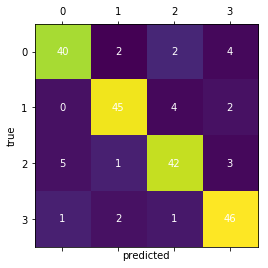

[[40, 0, 5, 1], [2, 45, 1, 2], [2, 4, 42, 1], [4, 2, 3, 46]]
avg recall precision 0.8657679277244494 0.8657679277244494
avg classification rate 0.865
f1 0.8657679277244494


In [5]:
#now use the pruned model on the test set again

y_pred=model.predict(test[:,:-1])
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
r=ev.avg_recall_precision(cm)
print('avg recall precision',r[0],r[1])
print('avg classification rate',ev.avg_classification_rate(cm))
print('f1',ev.f1_score(r[0],r[1]))

In [6]:
model.get_max_depth()

16